In [471]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984


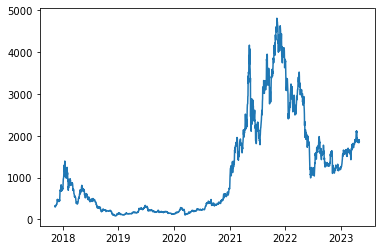

In [472]:
ticker = yf.Ticker("ETH-USD")

# 1 year of data 
hist = ticker.history(period="max")
# hist = ticker.history(period="max")

hist = hist.drop(columns=['Dividends', 'Stock Splits']) # removing these columns

plt.plot(hist['Close'])

hist.head()

,Open,High,Low,Close,Volume,50ma,200ma,signal,Trade
Date,,,,,,,,,
2018-05-28 00:00:00+00:00,573.044983,576.049011,512.552002,516.036011,2356900096,637.406821,704.558711,-1,0
2018-05-29 00:00:00+00:00,516.148010,572.263977,516.148010,565.388000,2330820096,640.744061,705.889386,-1,0
2018-05-30 00:00:00+00:00,566.830017,583.135986,545.431030,559.590027,2053970048,643.651002,707.113931,-1,0
2018-05-31 00:00:00+00:00,558.497009,585.538025,557.065979,577.645020,1985040000,646.593102,708.462616,-1,0
2018-06-01 00:00:00+00:00,578.671997,589.093018,567.664978,580.043030,1945890048,648.335142,709.779251,-1,0
2018-06-02 00:00:00+00:00,580.429016,597.077026,577.322021,591.807983,1880390016,650.316602,711.050136,-1,0
2018-06-03 00:00:00+00:00,591.258972,624.513000,591.258972,618.328979,1832550016,652.653622,712.474996,-1,0
2018-06-04 00:00:00+00:00,619.437012,623.429016,583.747009,592.984985,1903430016,653.879281,713.785301,-1,0
2018-06-05 00:00:00+00:00,593.406006,611.330017,580.981995,609.302979,1844269952,655.842401,715.169846,-1,0


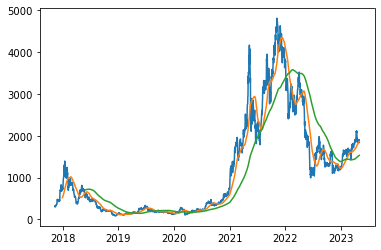

In [473]:
# creating moving averages

small_size = 50
large_size = 200

hist[f'{small_size}ma'] = hist['Close'].rolling(window=small_size).mean()
hist[f'{large_size}ma'] = hist['Close'].rolling(window=large_size).mean()
hist["signal"] = np.where(hist[f'{small_size}ma'] > hist[f'{large_size}ma'], 1, -1)

# column to determine whether to buy or sell or do nothing
hist["Trade"] = np.where(hist["signal"] != hist["signal"].shift(1), hist["signal"], 0)


hist.to_csv('data/ETH-USD.csv') # saving the data to a csv file

plt.plot(hist['Close'])
plt.plot(hist[f'{small_size}ma'])
plt.plot(hist[f'{large_size}ma'])

hist.iloc[200:210,:]


# When to buy?

When the SMA indicators change or when the simple moving averages cross then it's a sign that it might be time to buy. 

* Buy: the indicator goes from -1 to 1
* Sell: the indicator goes from 1 to -1 

In [474]:
# trade_history = []
# for i in range(len(hist)-1):
#     current_signal = hist.iloc[i,-1]
#     next_signal = hist.iloc[i+1,-1]
#     time = hist.index[i+1]

#     if current_signal < next_signal:
#         trade_history.append((time, "Buy"))
#         # print("Buy at: ", time)
#     elif current_signal > next_signal:
#         trade_history.append((time, "Sell"))
#         # print("Sell at: ", time)

# # create column in hist that indicates when to buy or sell or do nothing
# hist["Trade"] = np.where(hist["signal"] != hist["signal"].shift(1), hist["signal"], 0)

# trades = pd.DataFrame(trade_history, columns=["Date", "Trade"])
# trades.head()
    

2017-11-09 00:00:00+00:00


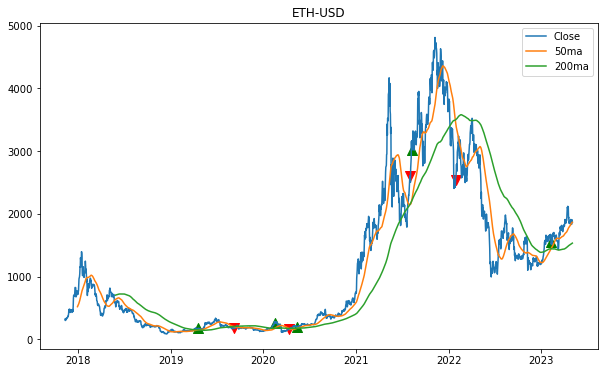

In [475]:
def plot_decisions(n):
    time_period = hist.index 
    start_time = time_period[-n]
    print(start_time)

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(time_period[-n:], hist['Close'][-n:], label='Close')
    ax.plot(time_period[-n:], hist[f'{small_size}ma'][-n:], label=f'{small_size}ma')
    ax.plot(time_period[-n:], hist[f'{large_size}ma'][-n:], label=f'{large_size}ma')

    for i in range(len(hist)):
        time = hist.index[i]
        trade = hist.iloc[i,-1]

        if time <= start_time:
            continue
        else:
            if trade == 1: # buy 
                ax.scatter(time, hist.loc[time, "Close"], color="green", marker="^", s=100)
            elif trade == -1: # sell
                ax.scatter(time, hist.loc[time, "Close"], color="red", marker="v", s=100)
            else: # do nothing
                continue
    leg = ax.legend(loc='upper right')
    ax.set_title('ETH-USD')

n = 0
plot_decisions(n)


In [476]:
starting_money = 100000
starting_price = hist.iloc[0,3]
hold_eth_owned = int(starting_money / starting_price)

print(f"Starting portfolio value: ${starting_money}")
print(f"Starting price of ETH: ${starting_price}")
print(f"We can currently afford {hold_eth_owned} ETH")

Starting portfolio value: $100000
Starting price of ETH: $320.8840026855469
We can currently afford 311 ETH


In [477]:

portfolio = pd.DataFrame(
    columns=[
        "time",
        "ETH Price",
        "ETH Owned", 
        "ETH Value",
        "Cash", 
        "percent cash",
        "Portfolio Value",
        # "Hold Portfolio Value"
    ]
)
portfolio.head()

cash = starting_money # cash available to buy ETH
eth_owned = 0 


for i in range(len(hist))[-n:]:
    time = hist.index[i]
    price = hist.loc[time, "Close"]
    decision = hist.loc[time, "Trade"] # -1 = sell, 1 = buy, 0 = do nothing
    eth_price = hist.loc[time, "Close"]
    

    if decision == 1: # BUY 

        eth_purchased = np.floor(cash / eth_price)
        print(f"Buying {eth_purchased} ETH at {eth_price} at {time}")

        eth_owned += eth_purchased
        cash -= eth_purchased * eth_price
    elif decision == -1: # SELL
        eth_sold = eth_owned
        print(f"Selling {eth_sold} ETH at {eth_price} at {time}")


        eth_owned -= eth_sold
        cash += eth_sold * eth_price
        eth_owned = 0

        print(f"Selling {eth_owned} ETH at {eth_price} at {time}")
    else: # HOLD / DO NOTHING
        pass

    eth_value = eth_owned * eth_price # how much the ETH we own is worth
    portfolio_value = eth_value + cash # total value of portfolio
    # hold_str_portfolio_value = hold_eth_owned * price
    percent_cash = cash / portfolio_value
    
    portfolio.loc[i] = [
        time, 
        eth_price,
        eth_owned, 
        eth_value,
        cash,
        percent_cash,
        portfolio_value,
        # hold_str_portfolio_value
    ]


Selling 0 ETH at 320.8840026855469 at 2017-11-09 00:00:00+00:00
Selling 0 ETH at 320.8840026855469 at 2017-11-09 00:00:00+00:00
Buying 575.0 ETH at 173.70843505859375 at 2019-04-19 00:00:00+00:00
Selling 575.0 ETH at 174.21713256835938 at 2019-09-05 00:00:00+00:00
Selling 0 ETH at 174.21713256835938 at 2019-09-05 00:00:00+00:00
Buying 385.0 ETH at 259.89471435546875 at 2020-02-16 00:00:00+00:00
Selling 385.0 ETH at 158.2160186767578 at 2020-04-11 00:00:00+00:00
Selling 0 ETH at 158.2160186767578 at 2020-04-11 00:00:00+00:00
Buying 306.0 ETH at 199.1932830810547 at 2020-05-13 00:00:00+00:00
Selling 306.0 ETH at 2610.1533203125 at 2021-08-02 00:00:00+00:00
Selling 0 ETH at 2610.1533203125 at 2021-08-02 00:00:00+00:00
Buying 265.0 ETH at 3013.732666015625 at 2021-08-08 00:00:00+00:00
Selling 265.0 ETH at 2547.092041015625 at 2022-01-28 00:00:00+00:00
Selling 0 ETH at 2547.092041015625 at 2022-01-28 00:00:00+00:00
Buying 436.0 ETH at 1546.438232421875 at 2023-02-09 00:00:00+00:00


In [478]:
portfolio.head()

,time,ETH Price,ETH Owned,ETH Value,Cash,percent cash,Portfolio Value
0,2017-11-09 00:00:00+00:00,320.884003,0.0,0.0,100000.0,1.0,100000.0
1,2017-11-10 00:00:00+00:00,299.252991,0.0,0.0,100000.0,1.0,100000.0
2,2017-11-11 00:00:00+00:00,314.681000,0.0,0.0,100000.0,1.0,100000.0
3,2017-11-12 00:00:00+00:00,307.907990,0.0,0.0,100000.0,1.0,100000.0
4,2017-11-13 00:00:00+00:00,316.716003,0.0,0.0,100000.0,1.0,100000.0


Text(0.5, 1.0, 'Portfolio Value Over Time')

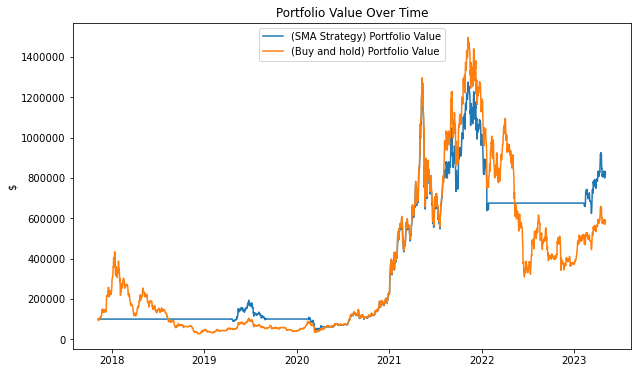

In [479]:
fig, ax = plt.subplots(figsize=(10,6))

time = portfolio["time"] # x axis
ax.plot(time, portfolio["Portfolio Value"], label="(SMA Strategy) Portfolio Value")  
ax.plot(time,hist["Close"]*hold_eth_owned, label="(Buy and hold) Portfolio Value")

leg = ax.legend(loc='upper center')

ax.set_ylabel("$")
# don't show y axis in scientific notation
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title("Portfolio Value Over Time")


In [480]:
# starting portfolio value
print(f"Starting value of portfolio: ${starting_money}\n")

# ending portfolio value
ending_value = portfolio.iloc[-1,-1]
print(f"Ending value of portfolio: ${ending_value}")

# CAGR 
end_time = portfolio.iloc[-1,0]
start_time = portfolio.iloc[0,0]

# ending price of ETH
ending_price = hist.iloc[-1,3]
hold_ending_value = ending_price * hold_eth_owned
print(f"Buy and hold ending value: ${hold_ending_value}")


years = (end_time - start_time).days / 365
SMA_cagr = (ending_value / starting_money) ** (1/years) - 1 
hold_cagr = (hold_ending_value / starting_money) ** (1/years) - 1 

print(f"\nSMA Trading Strategy CAGR: {SMA_cagr}")
print(f"Buy and Hold CAGR: {hold_cagr}")


Starting value of portfolio: $100000

Ending value of portfolio: $818496.9716949463
Buy and hold ending value: $583127.7333984375

SMA Trading Strategy CAGR: 0.4670981092297941
Buy and Hold CAGR: 0.3791524091800429
